# Алёшин А.Д.
# ИУ5-83Б

# Лабораторная работа 5. Рекомендации по формализации и расчетам характеристик подсистем КИС в виде разомкнутых или замкнутых стохастических моделей

## Задание 1.

Для  одноканальной системы массового обслуживания с ограничением на длину очереди $m$ составьте дифференциальные уравнения для вероятностей нахождения в заданных состояниях в зависимости от времени. Найдите эти вероятности при определенном в соответствии с вариантом значении $t$, а также при $t\rightarrow \infty$. Канал иногда может выходить из строя. Заявка, которая обслуживается в момент отказа канала ставится в очередь, если там есть места, в противном случае она покидает систему необслуженной. Входящий поток, поток обслуживания, поток отказов и поток восстановления простейшие с соответствующими интенсивностями $\lambda, \mu, \nu, \gamma$. Количество клиентов, от которых могут поступать заявки на обслуживание $k$. Начальные условия $P_0(0)=1$. 
    
    Найти (теоретически и экспериментально):
    
     - вероятность простоя;
     - вероятность образования очереди;     
     - абсолютную пропускную способность;     
     - среднюю длину очереди;     
     - среднее время нахождения заявок в системе;     
     - среднее число заявок в системе.     
     - среднее время нахождения в очереди.

In [2]:
Variant<-14
set.seed(Variant) 
m<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu)
  {current<-lambda; 
   lambda<-mu; 
   mu<-current}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu)
  {current<-nu; 
   nu<-gamma; 
   gamma<-current}
if (sample(c(0:1),1)) 
{k<-sample(c(4:7),1)} else {k<-"inf"}
t<-runif(1)
print("--------------")
data.frame(lambda, mu, nu, gamma, k, m, t)

[1] "--------------"


lambda,mu,nu,gamma,k,m,t
0.6378273,0.9571886,0.5525467,0.9830671,5,12,0.4284277


In [36]:
Variant<-1
set.seed(Variant) 
m<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu)
  {current<-lambda; 
   lambda<-mu; 
   mu<-current}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu)
  {current<-nu; 
   nu<-gamma; 
   gamma<-current}
if (sample(c(0:1),1)) 
{k<-sample(c(4:7),1)} else {k<-"inf"}
t<-runif(1)
print("--------------")
data.frame(lambda, mu, nu, gamma, k, m, t)

[1] "--------------"


lambda,mu,nu,gamma,k,m,t
0.3721239,0.5728534,0.2016819,0.9082078,inf,12,0.9446753


# Теоретическое решение

Граф состояний системы:
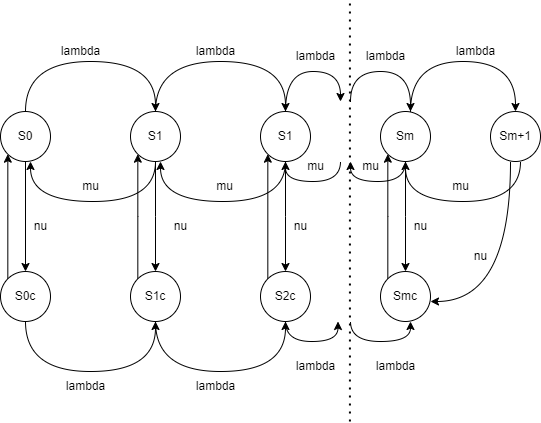
Зададим состостояния:

-   $S_0$ - канал свободен, очередь пуста, канал без отказов;
-   $S_1$ - канал занят, очередь пуста, канал без отказов;
-   $S_i, \; i \le m+1$ - канал занят, очередь состоит из $i-1$ заявки,
    канал без отказов;
-   $S_0с$ - очередь пуста, канал не работает;
-   $Sс_1$ - очередь состоит из 1 заявки, канал не работает;
-   $S_iс, \; i \le m$ - очередь состоит из $i$ заявок, канал не
    работает.

Составим уравнения Колмогорова:
\begin{cases}
\frac{dP_0(t)}{dt} = - (\lambda + \nu) \cdot P_0(t) + \mu \cdot P_1(t) + \gamma \cdot P_{0c}(t) \\ 
\frac{dP_1(t)}{dt} = - (\lambda + \nu + \mu) \cdot P_1(t) + \mu \cdot P_2(t) + \gamma \cdot P_{1c}(t) + \lambda \cdot P_0(t) \\ 
... \\
\frac{dP_m(t)}{dt} = - (\lambda + \nu + \mu) \cdot P_m(t) +
\mu \cdot P_{m+1}(t) + \gamma \cdot P_{mc}(t) + \lambda \cdot P_{m-1}(t) \\ \frac{dP_{m+1}(t)}{dt} = - (\nu + \mu) \cdot P_{m+1}(t) + \lambda \cdot P_{m}(t) \\
\frac{dP_{0c}(t)}{dt} = - (\lambda + \gamma) \cdot P_{0c}(t) + \nu \cdot P\_{0}(t) \\
\frac{dP_{1c}(t)}{dt} = - (\lambda + \gamma) \cdot P_{1c}(t) + \nu \cdot P_{1}(t) + \lambda \cdot P_{0c}(t) \\ 
... \\
\frac{dP_{(m-1)c}(t)}{dt} = - (\lambda + \gamma) \cdot P\_{(m-1)c}(t) + \nu \cdot P\_{m-1}(t) + \lambda \cdot P_{(m-2)c}(t) \\ 
\frac{dP_{mc}(t)}{dt} = - \gamma \cdot P_{mc}(t) + \nu \cdot P\_{m}(t) + \nu \cdot P_{m+1}(t) + \lambda \cdot P_{(m-1)c}\\
\end{cases}

Составим СДУ для заданного $m=12$:
\begin{cases}
\frac{dP_0(t)}{dt} = - ( \lambda + \nu) \cdot P_0(t) + \mu \cdot P_1(t) + \gamma \cdot P_{0c}(t) \\
\frac{dP_1(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_1(t) + \mu \cdot P_2(t) + \gamma \cdot P_{1c}(t) +  \lambda \cdot P_0(t) \\
\frac{dP_2(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_2(t) + \mu \cdot P_3(t) + \gamma \cdot P_{2c}(t) +  \lambda \cdot P_1(t) \\
\frac{dP_3(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_3(t) + \mu \cdot P_4(t) + \gamma \cdot P_{3c}(t) +  \lambda \cdot P_2(t) \\
\frac{dP_4(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_4(t) + \mu \cdot P_5(t) + \gamma \cdot P_{4c}(t) +  \lambda \cdot P_3(t) \\
\frac{dP_5(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_5(t) + \mu \cdot P_6(t) + \gamma \cdot P_{5c}(t) +  \lambda \cdot P_4(t) \\
\frac{dP_6(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_6(t) + \mu \cdot P_7(t) + \gamma \cdot P_{6c}(t) +  \lambda \cdot P_5(t) \\
\frac{dP_7(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_7(t) + \mu \cdot P_8(t) + \gamma \cdot P_{7c}(t) +  \lambda \cdot P_6(t) \\
\frac{dP_8(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_8(t) + \mu \cdot P_{9}(t) + \gamma \cdot P_{8c}(t) +  \lambda \cdot P_{7}(t) \\
\frac{dP_9(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_9(t) + \mu \cdot P_{10}(t) + \gamma \cdot P_{9c}(t) +  \lambda \cdot P_{8}(t) \\
\frac{dP_{10}(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_{10}(t) + \mu \cdot P_{11}(t) + \gamma \cdot P_{10c}(t) +  \lambda \cdot P_{9}(t) \\
\frac{dP_{11}(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_{11}(t) + \mu \cdot P_{12}(t) + \gamma \cdot P_{11c}(t) +  \lambda \cdot P_{10}(t) \\
\frac{dP_{12}(t)}{dt} = - ( \lambda + \nu + \mu) \cdot P_{12}(t) + \mu \cdot P_{13}(t) + \gamma \cdot P_{12c}(t) +  \lambda \cdot P_{11}(t) \\
\frac{dP_{13}(t)}{dt} = - (\nu + \mu) \cdot P_{13}(t) +  \lambda \cdot P_{12}(t) \\
\frac{dP_{0c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{0c}(t) + \nu \cdot P_{0}(t) \\
\frac{dP_{1c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{1c}(t) + \nu \cdot P_{1}(t) +  \lambda \cdot P_{0c}(t) \\
\frac{dP_{2c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{2c}(t) + \nu \cdot P_{2}(t) +  \lambda \cdot P_{1c}(t) \\
\frac{dP_{3c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{3c}(t) + \nu \cdot P_{3}(t) +  \lambda \cdot P_{2c}(t) \\
\frac{dP_{4c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{4c}(t) + \nu \cdot P_{4}(t) +  \lambda \cdot P_{3c}(t) \\
\frac{dP_{5c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{5c}(t) + \nu \cdot P_{5}(t) +  \lambda \cdot P_{4c}(t) \\
\frac{dP_{6c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{6c}(t) + \nu \cdot P_{6}(t) +  \lambda \cdot P_{5c}(t) \\
\frac{dP_{7c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{7c}(t) + \nu \cdot P_{7}(t) +  \lambda \cdot P_{6c}(t) \\
\frac{dP_{8c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{8c}(t) + \nu \cdot P_{8}(t) +  \lambda \cdot P_{7c}(t) \\
\frac{dP_{9c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{9c}(t) + \nu \cdot P_{9}(t) +  \lambda \cdot P_{8c}(t) \\
\frac{dP_{10c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{10c}(t) + \nu \cdot P_{10}(t) +  \lambda \cdot P_{9c}(t) \\
\frac{dP_{11c}(t)}{dt} = - ( \lambda + \gamma) \cdot P_{11c}(t) + \nu \cdot P_{11}(t) +  \lambda \cdot P_{10c}(t) \\
\frac{dP_{12c}(t)}{dt} = - \gamma \cdot P_{12c}(t) + \nu \cdot P_{12}(t) + \nu \cdot P_{13}(t) +  \lambda \cdot P_{11c}(t)\\
\end{cases}

Решим её числено для $t_0 = 0.9446753$

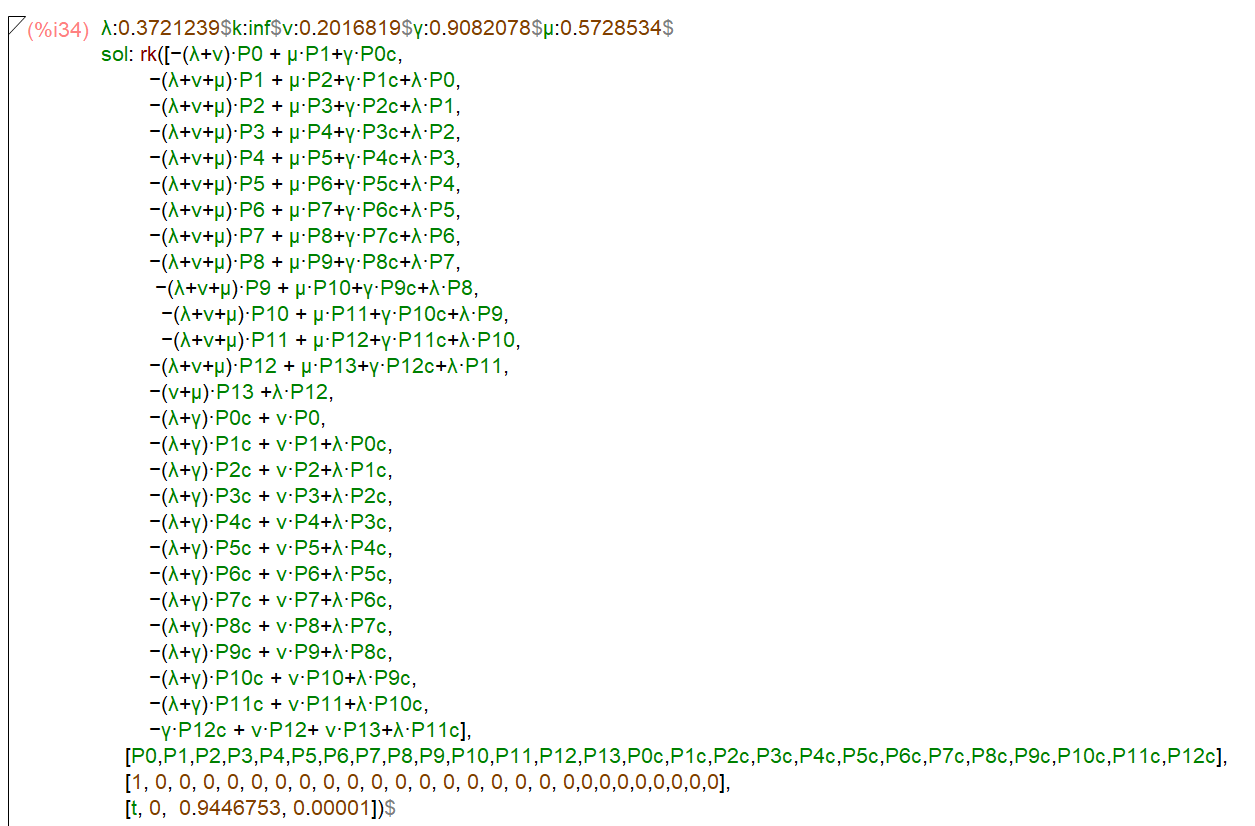
Получились следующие результаты
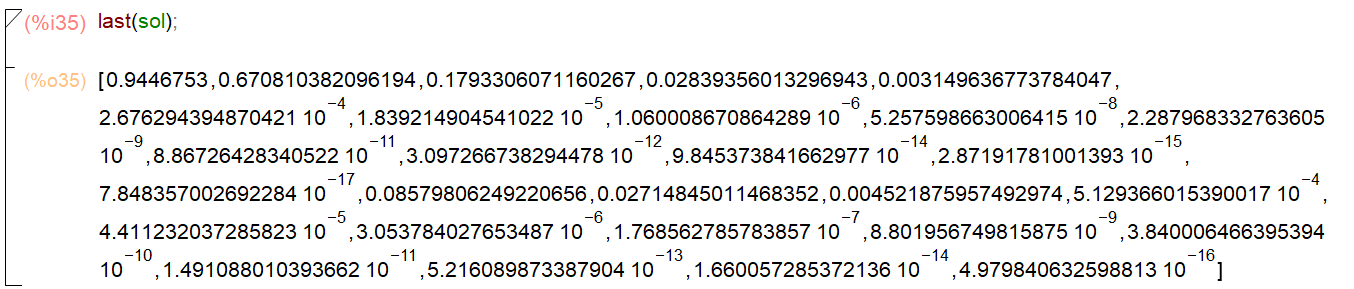

Найдём финальные вероятности. Для этого следует решить следующую систему:

\begin{cases}
0 = - ( \lambda + \nu) \cdot P_0 + \mu \cdot P_1 + \gamma \cdot P_{0c} \\
0 = - ( \lambda + \nu + \mu) \cdot P_1 + \mu \cdot P_2 + \gamma \cdot P_{1c} +  \lambda \cdot P_0 \\
0 = - ( \lambda + \nu + \mu) \cdot P_2 + \mu \cdot P_3 + \gamma \cdot P_{2c} +  \lambda \cdot P_1 \\
0 = - ( \lambda + \nu + \mu) \cdot P_3 + \mu \cdot P_4 + \gamma \cdot P_{3c} +  \lambda \cdot P_2 \\
0 = - ( \lambda + \nu + \mu) \cdot P_4 + \mu \cdot P_5 + \gamma \cdot P_{4c} +  \lambda \cdot P_3 \\
0 = - ( \lambda + \nu + \mu) \cdot P_5 + \mu \cdot P_6 + \gamma \cdot P_{5c} +  \lambda \cdot P_4 \\
0 = - ( \lambda + \nu + \mu) \cdot P_6 + \mu \cdot P_7 + \gamma \cdot P_{6c} +  \lambda \cdot P_5 \\
0 = - ( \lambda + \nu + \mu) \cdot P_7 + \mu \cdot P_8 + \gamma \cdot P_{7c} +  \lambda \cdot P_6 \\
0 = - ( \lambda + \nu + \mu) \cdot P_8 + \mu \cdot P_9 + \gamma \cdot P_{8c} +  \lambda \cdot P_7 \\
0 = - ( \lambda + \nu + \mu) \cdot P_9 + \mu \cdot P_{10} + \gamma \cdot P_{9c} +  \lambda \cdot P_8 \\
0 = - ( \lambda + \nu + \mu) \cdot P_{10} + \mu \cdot P_{11} + \gamma \cdot P_{10c} +  \lambda \cdot P_9 \\
0 = - ( \lambda + \nu + \mu) \cdot P_{11} + \mu \cdot P_{12} + \gamma \cdot P_{11c} +  \lambda \cdot P_{10} \\
0 = - ( \lambda + \nu + \mu) \cdot P_{12} + \mu \cdot P_{13} + \gamma \cdot P_{12c} +  \lambda \cdot P_{11} \\
0 = - (\nu + \mu) \cdot P_13 +  \lambda \cdot P_12 \\
0 = - ( \lambda + \gamma) \cdot P_{0c} + \nu \cdot P_0 \\
0 = - ( \lambda + \gamma) \cdot P_{1c} + \nu \cdot P_1 +  \lambda \cdot P_{0c} \\
0 = - ( \lambda + \gamma) \cdot P_{2c} + \nu \cdot P_2 +  \lambda \cdot P_{1c} \\
0 = - ( \lambda + \gamma) \cdot P_{3c} + \nu \cdot P_3 +  \lambda \cdot P_{2c} \\
0 = - ( \lambda + \gamma) \cdot P_{4c} + \nu \cdot P_4 +  \lambda \cdot P_{3c} \\
0 = - ( \lambda + \gamma) \cdot P_{5c} + \nu \cdot P_5 +  \lambda \cdot P_{4c} \\
0 = - ( \lambda + \gamma) \cdot P_{6c} + \nu \cdot P_6 +  \lambda \cdot P_{5c} \\
0 = - ( \lambda + \gamma) \cdot P_{7c} + \nu \cdot P_7 +  \lambda \cdot P_{6c} \\
0 = - ( \lambda + \gamma) \cdot P_{8c} + \nu \cdot P_8 +  \lambda \cdot P_{7c} \\
0 = - ( \lambda + \gamma) \cdot P_{9c} + \nu \cdot P_9 +  \lambda \cdot P_{8c} \\
0 = - ( \lambda + \gamma) \cdot P_{10c} + \nu \cdot P_{10} +  \lambda \cdot P_{9c} \\
0 = - ( \lambda + \gamma) \cdot P_{11c} + \nu \cdot P_{11} +  \lambda \cdot P_{10c} \\
0 = - \gamma \cdot P_{12c} + \nu \cdot P_{12} + \nu \cdot P_{13} +  \lambda \cdot P_{11c} \\
\sum_{i=0}^{13}P_i + \sum_{i=0}^{12}P_{ic} = 1
\end{cases}

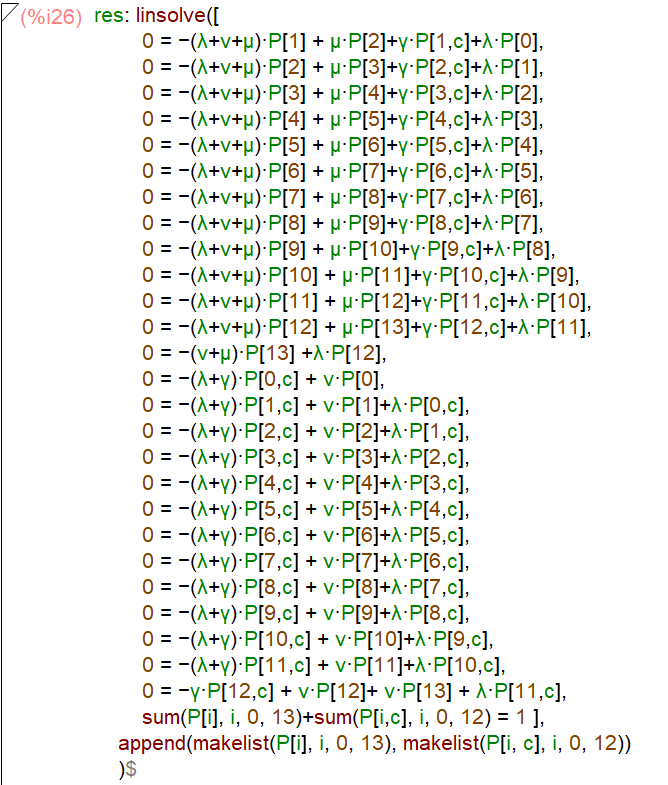

Получили следующие вероятности:
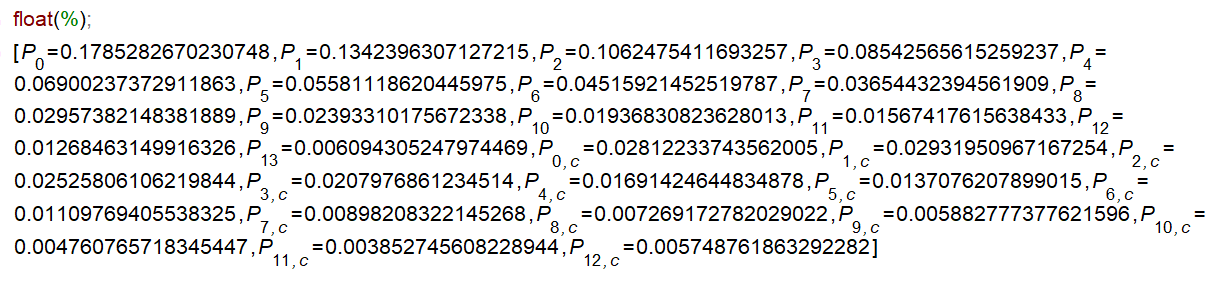

In [37]:
P<-c(0.1785282670230748, 0.1342396307127215, 0.1062475411693257, 0.08542565615259237, 0.06900237372911863, 0.05581118620445975, 0.04515921452519787, 0.03654432394561909, 0.02957382148381889, 0.02393310175672338, 0.01936830823628013, 0.01567417615638433, 0.01268463149916326, 0.006094305247974469)
Pc<-c(0.02812233743562005, 0.02931950967167254, 0.02525806106219844, 0.0207976861234514, 0.01691424644834878, 0.0137076207899015, 0.01109769405538325, 0.00898208322145268, 0.007269172782029022, 0.005882777377621596, 0.004760765718345447, 0.003852745608228944, 0.005748761863292282)

Вероятность простоя: $$
P_{прост} = P_0 = 0.1785282670230748
$$
Вероятность образования очереди:
$$
P_{оч} = \sum_{i=1}^{13}P_i + \sum_{i=1}^{12}P_{ic} = 1 - P_0 - P_{0c} =0.79334939554130515 
$$

In [38]:
P_q <- 1 - P[1] - Pc[1]
P_q

[1] 0.7933494

Абсолютная пропускная способность:
$$
P_{отк} = P_{13} + P_{12c} \\
\lambda' = (1-P_{отк})\cdot \lambda \cdot k = (1-P_{13} - P_{12c})\cdot \lambda \cdot k = 0.35777632602384 
$$

In [39]:
P_cancel <- P[9] + Pc[8]
A <- (1-P_cancel) * lambda
A

[1] 0.3577763

Среднее число заявок в системе:
$$
L_{сист} = \sum_{i=1}^{13}i\cdot P_i + \sum_{i=1}^{12}i\cdot P_{ic} = 3.41232762287626
$$

In [40]:
L_sys <- sum(P * c(0:13)) + sum(Pc * c(0:12))
L_sys

[1] 3.412328

Среднее время нахождения заявок в системе:
$$
W_{сист} = \frac{L_{сист}}{\lambda'} = 9.5376003795424
$$

In [41]:
W_sys <- L_sys / A
W_sys

[1] 9.5376

Среднее число заявок в системе:
$$
L_{оч} = \sum_{i=2}^{13}(i-1)\cdot P_i + \sum_{i=1}^{12}i\cdot P_{ic} = 4.1179952395511
$$

In [42]:
L_q <- sum(P * (c(2:13)-1)) + sum(Pc * c(1:12))
L_q

Warning message in P * (c(2:13) - 1):
"длина большего объекта не является произведением длины меньшего объекта"Warning message in Pc * c(1:12):
"длина большего объекта не является произведением длины меньшего объекта"

[1] 4.117995

Среднее время нахождения в очереди:

In [43]:
L_q<-4.1179952395511

$$
W_{оч} = \frac{L_{оч}}{\lambda'} = 11.5099712865761
$$

In [44]:
W_q <- L_q / A
W_q

[1] 11.50997

In [45]:
N <- 1000

event_times_of_tasks <- rexp(1, lambda) # k*N времён появления задач в системе
for (i in c(2:N)) {
  event_times_of_tasks <- c(event_times_of_tasks, event_times_of_tasks[max((i-2)*1+1, 1):((i-1))] + rexp(1, lambda))
}
event_times_of_tasks <- sort(event_times_of_tasks)

queue <- c() # индексы задач в очереди

lens <- c() # замеры длин очереди в моменты симуляции
task_counts <- c() # замеры числа задач в системе в моменты симуляции
simulation_time <- c() # время пребывания задач в системе

enter_serv <- rep(0, N) # время когда i задача зашла обрабатываться на сервер
lose_serv <- rep(0, N) # время которая i задача обрабатывалась в канале, но не успела добрабатываться т.к. канал сломался (по сути упущенное время выполнения на сервере)

queue_time <- rep(-1, N) # время пребывания i задачи в очереди. -1 значит что задаче было отказано
enter_queue <- rep(0, N) # время когда задача попала в очередь
canceled_tasks_count <- 0 # число отменённых задач

index_serv_task <- 0 # индекс задачи которая сейчас обслуживается каналом
index_current_task <- 1 # индекс текущей не поступившей в обработку задачи

event_enter_task <- event_times_of_tasks[index_current_task] # время события появления новой задачи
event_leave_serv <- 0 # время события выполнения задачи, если 0 значит канал свободен

event_repair_serv <- 0 # время события починки канала, если 0 значит канал не сломан
event_break_serv <- rexp(1, nu) # время события поломки канала, если 0 значит канал сломан

time <- 0 # время в симуляцие
dt <- 0.01 # шаг симуляции

while (index_current_task <= N || length(queue) != 0 || event_leave_serv != 0) { # ждём пока в систему запустят N задач и все они будут обработаны
  if (time >= event_enter_task && index_current_task <= N) { # событие появления задачи
    if (event_repair_serv != 0) { # если канал не на ременоте
      if (length(queue) != m) {
        queue <- c(queue, index_current_task)
      } else {
        canceled_tasks_count <- canceled_tasks_count + 1
      }
  
      enter_queue[index_current_task] <- 1
    } else {
      if (event_leave_serv != 0) { # если канал занят
        if (length(queue) != m) {
          queue <- c(queue, index_current_task)
        } else {
          canceled_tasks_count <- canceled_tasks_count + 1 
        }
        enter_queue[index_current_task] <- 1
      } else {
        index_serv_task <- index_current_task
        enter_serv[index_serv_task] <- event_enter_task
        queue_time[index_current_task] <- 0
        event_leave_serv <- event_enter_task + rexp(1, mu)
      }
    }
    
    index_current_task <- index_current_task + 1
    event_enter_task <- event_times_of_tasks[index_current_task]
  }
  
  if (event_break_serv != 0 && time >= event_break_serv) { # событие поломки канала
    if (event_leave_serv != 0) {
      enter_queue[index_serv_task] <- 1
      if (length(queue) != m) { # убрать в очередь если возможно текущую задачу
        queue <- c(queue, index_serv_task)
        lose_serv[index_serv_task] <- lose_serv[index_serv_task] + (event_break_serv - enter_serv[index_serv_task])
      } else {
        canceled_tasks_count <- canceled_tasks_count + 1
      }
    }
    
    event_repair_serv <- rexp(1, gamma) + event_break_serv
    event_break_serv <- 0
    event_leave_serv <- 0
  }
  
  if (event_repair_serv != 0 && time >= event_repair_serv) { # событие починки канала
    if (length(queue) != 0) { # достать из очереди если есть задачи
      index_serv_task <- queue[1]
      
      enter_serv[queue[1]] <- event_repair_serv
      event_leave_serv <- rexp(1, mu) + event_repair_serv
      queue_time[queue[1]] <- event_repair_serv - event_times_of_tasks[queue[1]] - lose_serv[queue[1]]
      queue <- queue[! queue %in% c(queue[1])]
    }
    
    event_break_serv <- rexp(1, nu) + event_repair_serv
    event_repair_serv <- 0
  }
  
  if (event_leave_serv != 0 && time >= event_leave_serv) { # событие выполенения на сервере
    simulation_time <- c(simulation_time, event_leave_serv - event_times_of_tasks[index_serv_task])
    
    if (length(queue) != 0) { # если есть ещё задачи 
      index_serv_task <- queue[1]
      enter_serv[queue[1]] <- event_leave_serv
      event_leave_serv <- rexp(1, mu) + event_leave_serv
      queue_time[queue[1]] <- event_leave_serv - event_times_of_tasks[queue[1]] - lose_serv[queue[1]]
      queue <- queue[! queue %in% c(queue[1])]
    } else {
      event_leave_serv <- 0
      index_serv_task <- 0
    }
  }
  
  task_counts <- c(task_counts, length(queue))
  if (event_leave_serv != 0) { # если у нас есть ещё задача выполняющаяся в канале
    task_counts[length(task_counts)] <- task_counts[length(task_counts)] + 1
  }
  time <- time + dt
  lens <- c(lens, length(queue))
}

P_q_P=(sum(enter_queue)/N)
P_empty_P=length(task_counts[task_counts==0])/length(task_counts)
L_q_P=mean(lens)
T_q_P=mean(queue_time[queue_time >= 0])
T_sys_P=mean(simulation_time)
L_sys_P=mean(task_counts)
A_P=mean(task_counts)/mean(simulation_time)
P_q_P
P_empty_P
L_q_P
T_q_P
T_sys_P
L_sys_P
A_P

[1] 0.858

[1] 0.233298

[1] 2.471939

[1] 7.600377

[1] 8.553141

[1] 3.095573

[1] 0.3619223